In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

### Deep learning Model: Single Layered Convulation network 

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
# convolution-maxpooling 1
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# convolution-maxpooling 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# convolution-maxpooling 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # converts 3D feature maps to 1D feature vectors
# hidden layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
batch_size = 16

# augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# augmentation configuration for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will indefinitely generate
# batches of augmented image data
print('loading train data..' )
train_generator = train_datagen.flow_from_directory(
        'new_leaf_data/train',  # this is the target directory
        target_size=(256, 256),  # all images will be resized to 256x256
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

print('loading validation data..')
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'new_leaf_data/test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

loading train data..
Found 33 images belonging to 2 classes.
loading validation data..
Found 11 images belonging to 2 classes.


In [32]:
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/5
125/125 [==============================] - 21s 170ms/step - loss: 0.6855 - acc: 0.6442 - val_loss: 0.5333 - val_acc: 0.7273
Epoch 2/5
125/125 [==============================] - 23s 180ms/step - loss: 0.2701 - acc: 0.9227 - val_loss: 0.3973 - val_acc: 0.8182
Epoch 3/5
125/125 [==============================] - 21s 166ms/step - loss: 0.1253 - acc: 0.9704 - val_loss: 0.5896 - val_acc: 0.8182
Epoch 4/5
125/125 [==============================] - 21s 167ms/step - loss: 0.0582 - acc: 0.9839 - val_loss: 1.0380 - val_acc: 0.8182
Epoch 5/5
125/125 [==============================] - 21s 170ms/step - loss: 0.0915 - acc: 0.9805 - val_loss: 1.1217 - val_acc: 0.7273


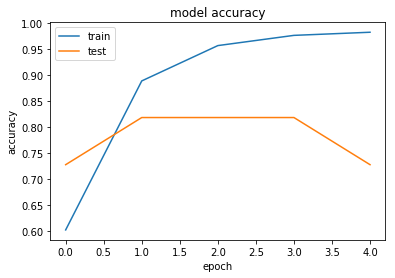

In [37]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

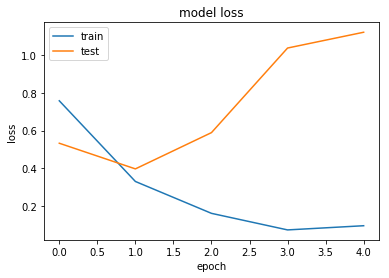

In [38]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()